## Data Collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
def readTextFile(file):
    with open(file,"r",encoding='utf8') as f:
        text=f.read()
    return text

In [3]:
caption=readTextFile("flickr30k_images/results.csv")

In [4]:
caption=caption.split('\n')[:-1]

In [5]:
len(caption)

158916

In [6]:
caption=caption[1:]
len(caption)

158915

In [7]:
### lets create a dictonary with image
dic={}
for x in caption:
    if (len(x.split('|'))!=3):
        continue
    img=x.split('|')[0]
    cap=x.split('|')[2]
    img_name=img.split('.')[0]
    
    if dic.get(img_name) is None:
        dic[img_name]=[]
    dic[img_name].append(cap)

In [8]:
img_path="flickr30k_images/flickr30k_images/"
import cv2
import matplotlib.pyplot as plt

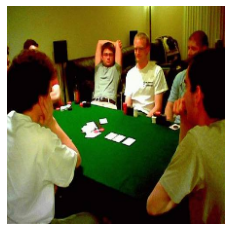

[' A group of friends playing cards and trying to bluff each other into making a terrible mistake .',
 ' A group of college students gathers to play texas hold em poker .',
 ' Several men play cards while around a green table .',
 ' A group of several men playing poker .',
 ' Six white males playing poker .']

In [9]:
img=cv2.imread(img_path+"36979"+".jpg")
img=cv2.resize(img,(224,224))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
dic["36979"]

## Data Cleaning

In [10]:
import re
def clean_text(sen):
    sen=sen.lower()
    sen=re.sub("[^a-z]+"," ",sen)       # include only character b/w a to z 
    sen=sen.split()
    
    sen=[s for s in sen if len(s)>1]
    sen=" ".join(sen)
    
    return sen 

In [11]:
clean_text("A car is Sitting over the  house # 32")

'car is sitting over the house'

In [12]:
for img,cap in dic.items():
    for i in range(len(cap)):
        cap[i]=clean_text(cap[i])

In [13]:
dic["36979"]

['group of friends playing cards and trying to bluff each other into making terrible mistake',
 'group of college students gathers to play texas hold em poker',
 'several men play cards while around green table',
 'group of several men playing poker',
 'six white males playing poker']

In [14]:
### Write all caption into text file locally
with open("description_new.txt","w",encoding='utf8') as f:
    f.write(str(dic))

## Vocabulary Creation  

In [15]:
import json
des=None
with open("description_new.txt","r",encoding='utf8') as f:
    des=f.read()
    
json_acceptable=des.replace("'","\"")
des=json.loads(json_acceptable)                     

In [16]:
print(type(des))

<class 'dict'>


In [17]:
des

{'1000092795': ['two young guys with shaggy hair look at their hands while hanging out in the yard',
  'two young white males are outside near many bushes',
  'two men in green shirts are standing in yard',
  'man in blue shirt standing in garden',
  'two friends enjoy time spent together'],
 '10002456': ['several men in hard hats are operating giant pulley system',
  'workers look down from up above on piece of equipment',
  'two men working on machine wearing hard hats',
  'four men on top of tall structure',
  'three men on large rig'],
 '1000268201': ['child in pink dress is climbing up set of stairs in an entry way',
  'little girl in pink dress going into wooden cabin',
  'little girl climbing the stairs to her playhouse',
  'little girl climbing into wooden playhouse',
  'girl going into wooden building'],
 '1000344755': ['someone in blue shirt and hat is standing on stair and leaning against window',
  'man in blue shirt is standing on ladder cleaning window',
  'man on ladder 

In [18]:
### Lets check total words in all captions 
total_words=[]
for cap in des.values():
    for sen in cap:
        sen=sen.split()
        [total_words.append(i) for i in sen]
print(len(total_words))

1679075


In [19]:
### Use of vocab to unique the words
vocab=set()
vocab.update(["hello","family"])
vocab.update(["hi","family"])
vocab.update(["happy","diwali"])
vocab

{'diwali', 'family', 'happy', 'hello', 'hi'}

In [20]:
### Lets make all words in vocab unique
vocab=set()
for cap in des.values():
    [vocab.update(sen.split()) for sen in cap]  
print(len(vocab))

18054


In [21]:
### for make vocab more shorter 
### remove words having frequency very low 
### like come 10 times in 10000 words

In [22]:
import collections

counter=collections.Counter(total_words)
freq_cnt=dict(counter)
print(len(freq_cnt))
print(freq_cnt)

18054
{'two': 21680, 'young': 13219, 'guys': 658, 'with': 36208, 'shaggy': 54, 'hair': 2777, 'look': 1330, 'at': 16262, 'their': 4037, 'hands': 1556, 'while': 11711, 'hanging': 662, 'out': 3454, 'in': 83520, 'the': 62984, 'yard': 394, 'white': 13290, 'males': 248, 'are': 20196, 'outside': 4702, 'near': 3016, 'many': 1290, 'bushes': 95, 'men': 9500, 'green': 5273, 'shirts': 1071, 'standing': 9114, 'man': 42626, 'blue': 11390, 'shirt': 14342, 'garden': 247, 'friends': 398, 'enjoy': 204, 'time': 319, 'spent': 2, 'together': 1785, 'several': 2105, 'hard': 657, 'hats': 842, 'operating': 107, 'giant': 204, 'pulley': 18, 'system': 35, 'workers': 1109, 'down': 7767, 'from': 4041, 'up': 5220, 'above': 680, 'on': 45686, 'piece': 744, 'of': 38844, 'equipment': 471, 'working': 2178, 'machine': 522, 'wearing': 15714, 'four': 2246, 'top': 2451, 'tall': 495, 'structure': 370, 'three': 5796, 'large': 4759, 'rig': 12, 'child': 5080, 'pink': 2878, 'dress': 2138, 'is': 41117, 'climbing': 994, 'set': 605,

In [23]:
sorted_freq_cnt=sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold]

In [24]:
sorted_freq_cnt[-1]       ### last member in list having freq>threshold 

('oxygen', 11)

In [25]:
## Thus words is my final vocab containing all possible words in captions
words=[x[0] for x in sorted_freq_cnt]
print(len(words))

5118


In [26]:
with open("words_new.txt","w",encoding="utf8") as f:
    for w in words:
        f.write(w+"\n")

In [27]:
words=[]
with open("words_new.txt","r",encoding='utf8') as f:
    for l in f:
        s=l.split()
        words.append(str(s)[2:-2])

## Prepare Test and Train Data

In [28]:
data=list(dic.keys())

In [29]:
len(data)

31783

In [30]:
split=(int)((0.9)*(len(data)))
train=data[0:split]
test=data[split:]
print(len(train),len(test))

28604 3179


In [31]:
### Preparing Description for training Data
### Tweak : add <s> and <e> token to our training data

train_des={}
for img_id in train:
    train_des[img_id]=[]
    for cap in des[img_id]:
        cap_to_append="startseq "+cap+" endseq"
        train_des[img_id].append(cap_to_append)

In [32]:
train_des["1000268201"]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq girl going into wooden building endseq']

## Transfer Learning 
- Images -> features
- Text -> features

###### - Preprocess data for images

In [33]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import *
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [34]:
model=ResNet50(weights='imagenet',input_shape=(224,224,3))
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [35]:
model.layers[-2]

In [36]:
model=Model(inputs=model.input,outputs=model.layers[-2].output)

In [37]:
model.save('./model_weights_new/model_00.h5')

In [38]:
def preprocess_img(path):
    img=image.load_img(path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
#     img=np.flip(img,-1)
#     img1=130-img1
    img=127.5-img
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


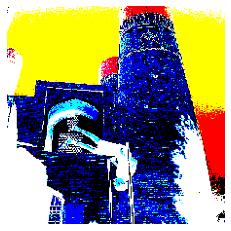

(1, 224, 224, 3)


In [39]:
img=preprocess_img(img_path+"81641"+".jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()
print(img.shape)

In [40]:
def encode_img(image):
    img=preprocess_img(image)
    features=model.predict(img)
    features=features.reshape(-1,)
    return features

In [41]:
encode_img(img_path+"1000268201"+".jpg").shape

(2048,)

In [42]:
from tqdm import tqdm
encoded_train={}
for idx,img_id in tqdm(enumerate(train)):
    pathh=img_path+str(img_id)+".jpg"
    encoded_train[img_id]=encode_img(pathh)



print("......Encoding Completed.......")

28604it [1:45:57,  4.50it/s]

......Encoding Completed.......


In [43]:
### Store our model in disk
import pickle
with open("encoded_trained_features_new.pkl","wb") as f:
    pickle.dump(encoded_train,f)

In [44]:
encoded_test={}
for idx,img_id in tqdm(enumerate(test)):
    pathh=img_path+str(img_id)+".jpg"
    encoded_test[img_id]=encode_img(pathh)

print("......Encoding Completed........")

3179it [15:18,  3.46it/s]

......Encoding Completed........


In [45]:
### Store our model in disk
with open("encoded_test_features_new.pkl","wb") as f:
    pickle.dump(encoded_test,f)

In [46]:
from pickle import load
encoded_train = load(open("encoded_trained_features_new.pkl", "rb"))
print('Photos: train=%d' % len(encoded_train))

Photos: train=28604


In [47]:
encoded_test = load(open("encoded_test_features_new.pkl", "rb"))
print('Photos: train=%d' % len(encoded_test))

Photos: train=3179


## - Preprocess data for captions

In [48]:
idx_to_word={}
word_to_idx={}

for idx,word in enumerate(words):
    word_to_idx[word]=idx+1
    idx_to_word[idx+1]=word

In [49]:
print(len(word_to_idx),len(idx_to_word))

5118 5118


In [50]:
word_to_idx["startseq"]=5119
idx_to_word[5119]="startseq"

word_to_idx["endseq"]=5120
idx_to_word[5120]="endseq"

In [51]:
print(len(word_to_idx),len(idx_to_word))

5120 5120


In [52]:
import pickle
with open("index2word_new.pkl","wb") as f:
    pickle.dump(idx_to_word,f)

In [53]:
with open("word2index_new.pkl","wb") as f:
    pickle.dump(word_to_idx,f)

In [54]:
with open("index2word_new.pkl","rb") as f:
	idx_to_word=pickle.load(f)
with open("word2index_new.pkl","rb") as f:
	word_to_idx=pickle.load(f)

In [55]:
vocab_size=len(word_to_idx)+1
print("vocab_size : ",vocab_size)

vocab_size :  5121


In [56]:
max_len=0
for img in train_des.keys():
    for cap in train_des[img]:
        max_len=max(max_len,len(cap.split()))
print(max_len)

74


## Data Loader (Generator)

In [57]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
### As we can't train such big data in memory at one time so we use
### data Generator to load data batch wise
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            photo = photos[key]
            for desc in desc_list:
                # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            #yield the batch data
            if n==num_photos_per_batch:
                yield [np.array(X1),np.array(X2)] , np.array(y)
                X1, X2, y = list(), list(), list()
                n=0

## Word Embedding 

In [58]:
f=open("glove.6B.50d.txt",encoding='utf8')

In [59]:
embedding_idx={}

for line in f:
    value=line.split()
    word=value[0]
    embedding_word=np.array(value[1:],dtype='float')
    embedding_idx[word]=embedding_word

In [60]:
f.close()

In [61]:
embedding_idx['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [62]:
def get_embedding_matrix():
    emb_dim=50
    matrix=np.zeros((vocab_size,emb_dim))
    
    for word,idx in word_to_idx.items():
        embedding_vector=embedding_idx.get(word)
        
        if embedding_vector is not None:
               matrix[idx]=embedding_vector
                
    return matrix

In [63]:
embedding_matrix=get_embedding_matrix()
print(embedding_matrix.shape)

(5121, 50)


## Model Arcitecture

In [64]:
### Image Model
a1=Input(shape=(2048,))
a2=Dropout(0.5)(a1)
a3=Dense(256,activation='relu')(a2)

### RNN Model for caption
c1=Input(shape=(max_len,))
c2=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(c1)
c3=Dropout(0.5)(c2)
c4=LSTM(256)(c3)

### Make output layers
decoder1=add([a3,c4])
decoder2=Dense(256,activation='relu')(decoder1)
output=Dense(vocab_size,activation='softmax')(decoder2)

### Combined these layers
model=Model(inputs=[a1,c1],outputs=output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 74)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 74, 50)       256050      input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
_______________________________________________________________________________________

In [65]:
### Set embedding layers to embedding
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False

In [66]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.0001))

## Training of Model

In [67]:
epochs=30
batch_size=3
number_pics_per_batch = 3
steps=len(train_des)//number_pics_per_batch
# checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [68]:
# XT,YT = data_generator(train_des,train_features, word_to_idx,max_len,3)
# model.fit(XT, YT, epochs=1, verbose=1, callbacks=[checkpoint], validation_split=0.2)
for i in range(epochs):
    generator = data_generator(train_des,encoded_train, word_to_idx, max_len, number_pics_per_batch)
    model.fit_generator(generator, steps_per_epoch=steps, verbose=1)
    model.save('./model_weights_new/model_' + str(i) + '.h5')

In [82]:
loaded_model=load_model("./model_weights_new/model_"+ str(34)+ ".h5")

In [83]:
def predict_cap(photo):
    in_txt="startseq"
    for i in range(max_len):
        sequence=[word_to_idx[w] for w in in_txt.split() if w in word_to_idx]
        seq=pad_sequences([sequence],maxlen=max_len,value=0,padding='post')
        y_pred=loaded_model.predict([photo,seq])
        y_pred=y_pred.argmax()
        word=idx_to_word[y_pred]
        in_txt+=' '+word
        
        if word=='endseq':
            break
    final_cap=in_txt.split()[1:-1]
    final_cap=' '.join(final_cap)
    
    return final_cap

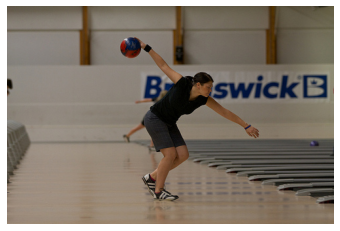

man in shorts and white shirt is playing volleyball


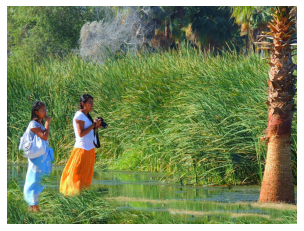

two people are playing soccer in field


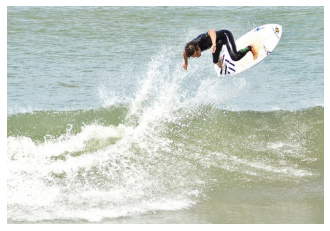

man in wetsuit is surfing in the ocean


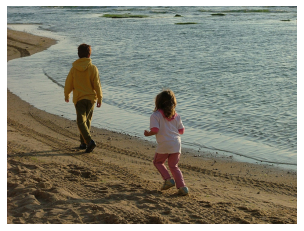

two men are playing soccer on beach


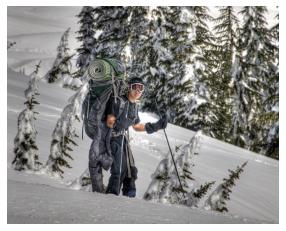

man in black shirt and black pants is standing on the ground with his arms on his head


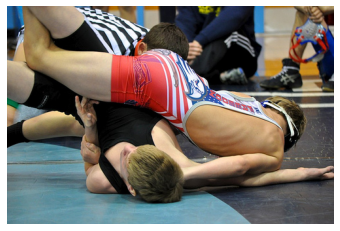

two women are dancing in boxing match


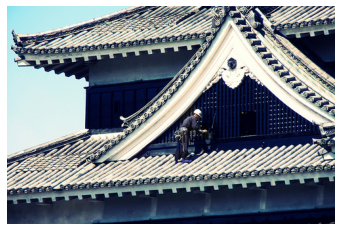

man in white shirt and white pants is standing on the roof of building


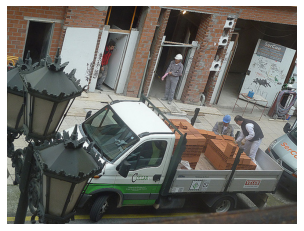

man in blue shirt is sitting on the ground next to man in white shirt and blue jeans


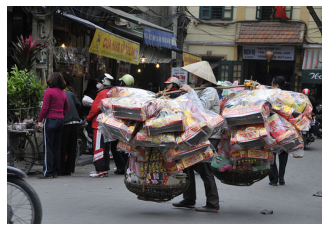

man in blue shirt and black pants is riding bike down the street


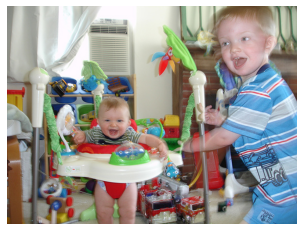

two young girls are playing with toy


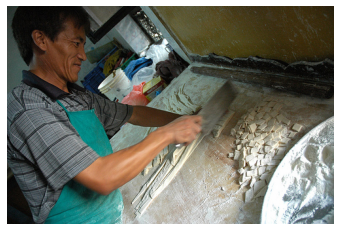

man in blue shirt is sitting on the floor with his hands up


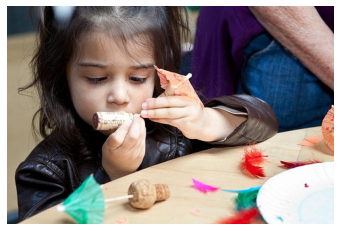

young boy is looking at his camera


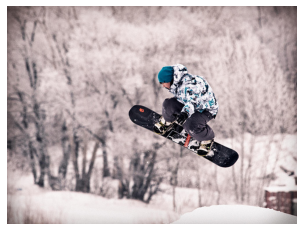

man in black and white striped shirt is surfing on the beach


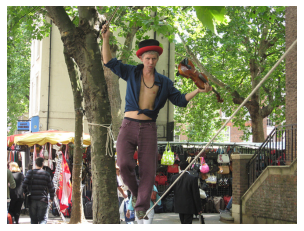

man in blue shirt and black pants is standing on the sidewalk with his hands up to the camera


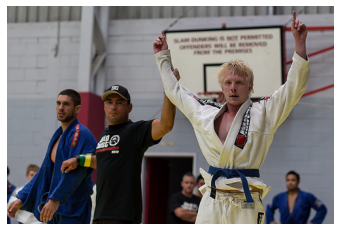

two men are playing instruments instruments


In [84]:
### Pick some random images
for i in range(15):
    idx=np.random.randint(0,1000)
    all_images=list(encoded_test.keys())
    img=all_images[idx]
    photo=encoded_test[img].reshape(1,2048)
    
    i=plt.imread(img_path+img+".jpg")
    caption=predict_cap(photo)
    plt.imshow(i)
    plt.axis("off")
    plt.show()
    print(caption)
